In [8]:
# CSc 84020 HW 3
# Sandeep Mudigonda

import os, shutil
full_image_dir = 'cats_dogs_data/full'
base_dir = 'cats_dogs_data'

cats_train_dir = os.path.join(os.path.join(base_dir,'train'),'cats')
dogs_train_dir = os.path.join(os.path.join(base_dir,'train'),'dogs')

cats_valid_dir = os.path.join(os.path.join(base_dir,'validation'),'cats')
dogs_valid_dir = os.path.join(os.path.join(base_dir,'validation'),'dogs')


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(cats_train_dir,fname)
    shutil.copyfile(src,dest)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(cats_valid_dir,fname)
    shutil.copyfile(src,dest)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(dogs_train_dir,fname)
    shutil.copyfile(src,dest)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(dogs_valid_dir,fname)
    shutil.copyfile(src,dest)



C:\Sandeep\Learning\NNDL-GC\HW\HW3\cats_dogs_data\train\cats


### Model building

In [10]:


from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.Adam(lr=1e-04,beta_1=0.9, beta_2=0.999),
             metrics=['acc'])

### Data Preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = 'cats_dogs_data'
train_dir = os.path.join(base_dir,'train')
valid_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('db shape', data_batch.shape)
    print('lb shape', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
db shape (20, 150, 150, 3)
lb shape (20,)


In [12]:

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = valid_generator,
                             validation_steps = 50)
model.save('cd_1.h5')


Epoch 1/30
100/100 [==============================] - 78s 779ms/step - loss: 0.6919 - acc: 0.5170 - val_loss: 0.6673 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 78s 777ms/step - loss: 0.6637 - acc: 0.5925 - val_loss: 0.6762 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 78s 778ms/step - loss: 0.6101 - acc: 0.6735 - val_loss: 0.6569 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 77s 768ms/step - loss: 0.5523 - acc: 0.7150 - val_loss: 0.4843 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 77s 773ms/step - loss: 0.4997 - acc: 0.7575 - val_loss: 0.5953 - val_acc: 0.7060
Epoch 6/30
100/100 [==============================] - 77s 766ms/step - loss: 0.4559 - acc: 0.7875 - val_loss: 0.4596 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 77s 770ms/step - loss: 0.4227 - acc: 0.8090 - val_loss: 0.6021 - val_acc: 0.7210
Epoch 8/30
100/100 [==============================] - 7

In [25]:
import pickle
hist_dump = open('cd1_HistoryDict.pickle', 'wb')
pickle.dump(history.history, hist_dump)
hist_dump.close()

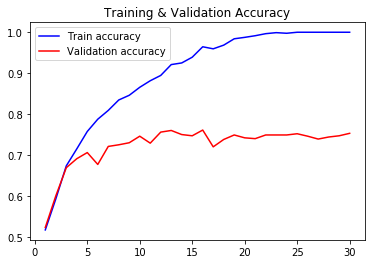

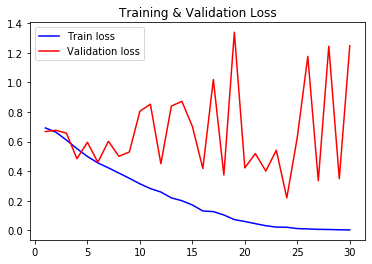

In [16]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'b', label='Train accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'b', label="Train loss")
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

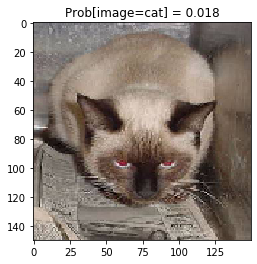

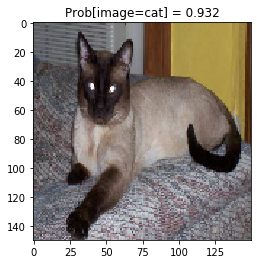

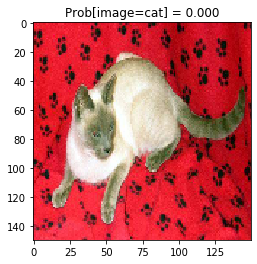

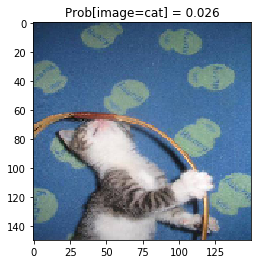

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

img_path = ['cats_dogs_data/test/cats/cat.1632.jpg',
              'cats_dogs_data/test/cats/cat.1782.jpg',
              'cats_dogs_data/test/cats/cat.1852.jpg',
              'cats_dogs_data/test/cats/cat.1917.jpg']
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

from keras.preprocessing import image
import numpy as np
from keras.models import load_model 

for i in range(4):
    img = image.load_img(img_path[i],target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    plt.imshow(img_tensor[0])

    m1 = load_model('cd_1.h5')
    plt.title('Prob[image=cat] = %.3f' % m1.predict(img_tensor)[0][0])
    plt.figure()

plt.show()


### Data Augmentation & DropOut
The above model is overfit as shown by the huge gap between training & validation accuracy and inconsistent validation loss. The solution would be to apply data augmentation & add dropout to the model

In [21]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# New model with dropout
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.Adam(lr=1e-04,beta_1=0.9, beta_2=0.999),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data = valid_generator,
                             validation_steps = 50)
model.save('cd_drop_aug.h5')


Epoch 1/50
100/100 [==============================] - 67s 670ms/step - loss: 0.6930 - acc: 0.5079 - val_loss: 0.6705 - val_acc: 0.5324
Epoch 2/50
100/100 [==============================] - 76s 759ms/step - loss: 0.6712 - acc: 0.5700 - val_loss: 0.8336 - val_acc: 0.5664
Epoch 3/50
100/100 [==============================] - 80s 796ms/step - loss: 0.6500 - acc: 0.6143 - val_loss: 0.6356 - val_acc: 0.6548
Epoch 4/50
100/100 [==============================] - 82s 821ms/step - loss: 0.6208 - acc: 0.6455 - val_loss: 0.6379 - val_acc: 0.7062
Epoch 5/50
100/100 [==============================] - 81s 808ms/step - loss: 0.6081 - acc: 0.6608 - val_loss: 0.6321 - val_acc: 0.6808
Epoch 6/50
100/100 [==============================] - 83s 825ms/step - loss: 0.5890 - acc: 0.6853 - val_loss: 0.4699 - val_acc: 0.7107
Epoch 7/50
100/100 [==============================] - 82s 816ms/step - loss: 0.5804 - acc: 0.6972 - val_loss: 0.5307 - val_acc: 0.7100
Epoch 8/50
100/100 [==============================] - 8

In [28]:
hist_dump = open('cd_dropAug_HistoryDict.pickle', 'wb')
pickle.dump(history.history, hist_dump)
hist_dump.close()

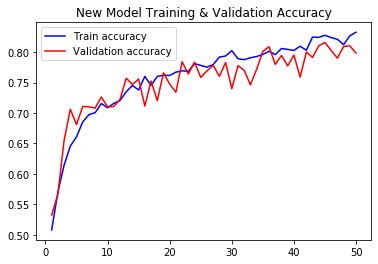

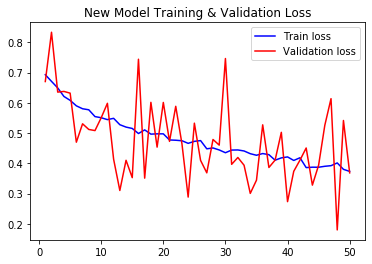

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'b', label='Train accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
plt.title('New Model Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'b', label="Train loss")
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('New Model Training & Validation Loss')
plt.legend()

plt.show()

## Visualizing 

In [32]:
# Import test data

import os, shutil
full_image_dir = 'cats_dogs_data/full'
base_dir = 'cats_dogs_data'

cats_test_dir = os.path.join(os.path.join(base_dir,'test'),'cats')
dogs_test_dir = os.path.join(os.path.join(base_dir,'test'),'dogs')

    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(cats_test_dir,fname)
    shutil.copyfile(src,dest)

    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(dogs_test_dir,fname)
    shutil.copyfile(src,dest)


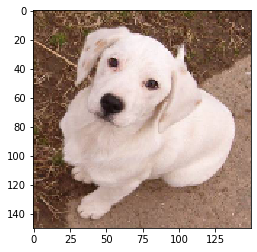

In [35]:
# import example image for channel activation map visualization
img_path = 'cats_dogs_data/test/dogs/dog.1512.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  
C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


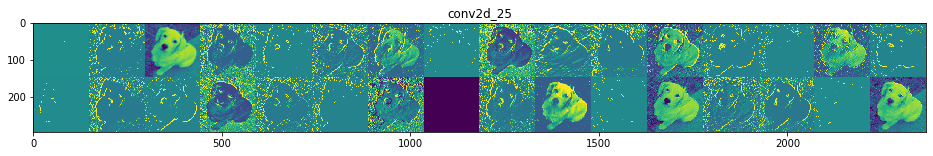

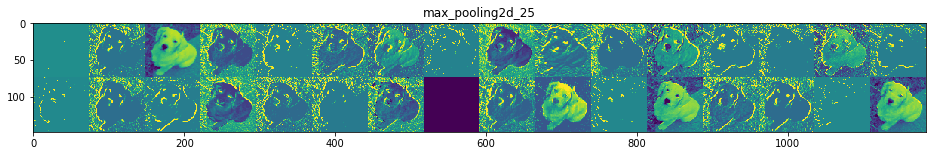

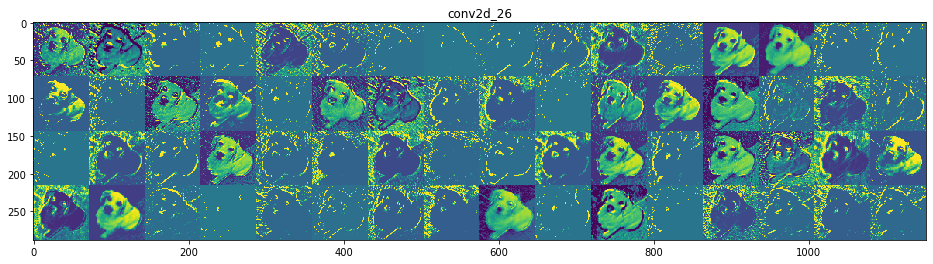

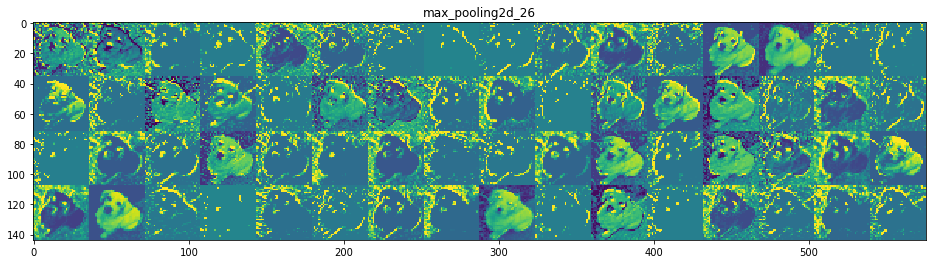

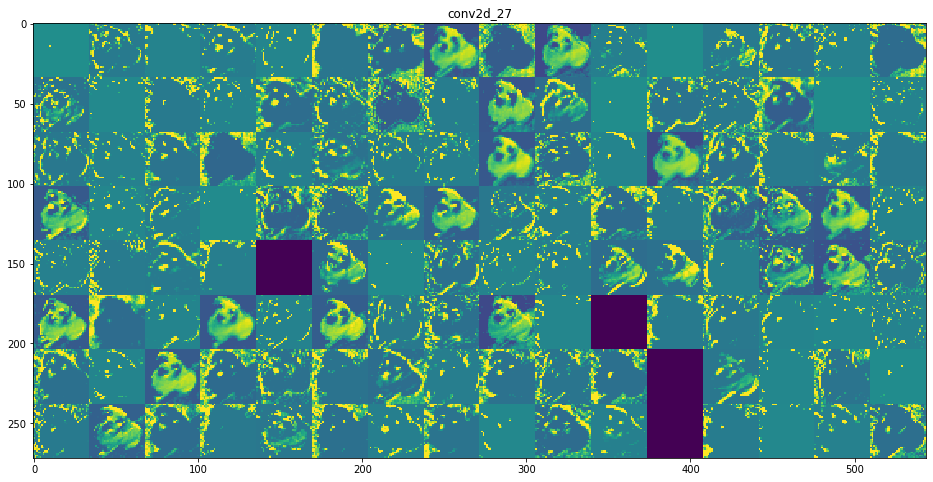

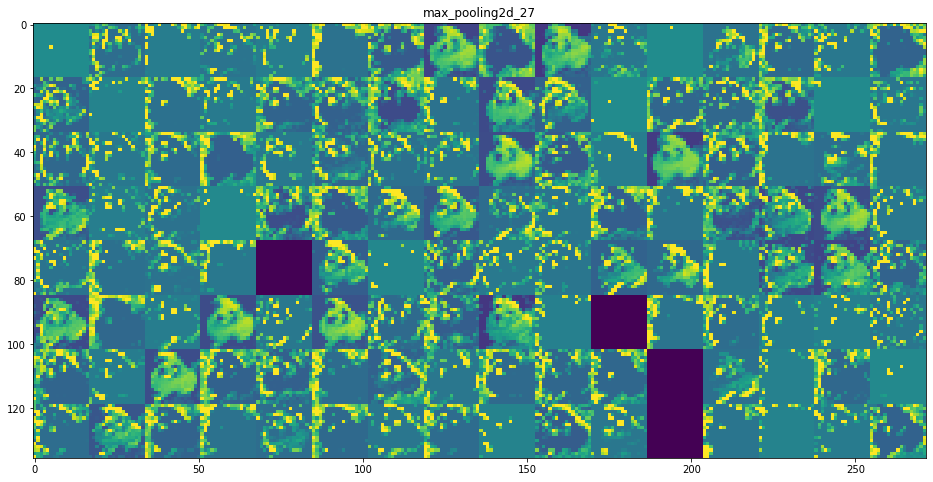

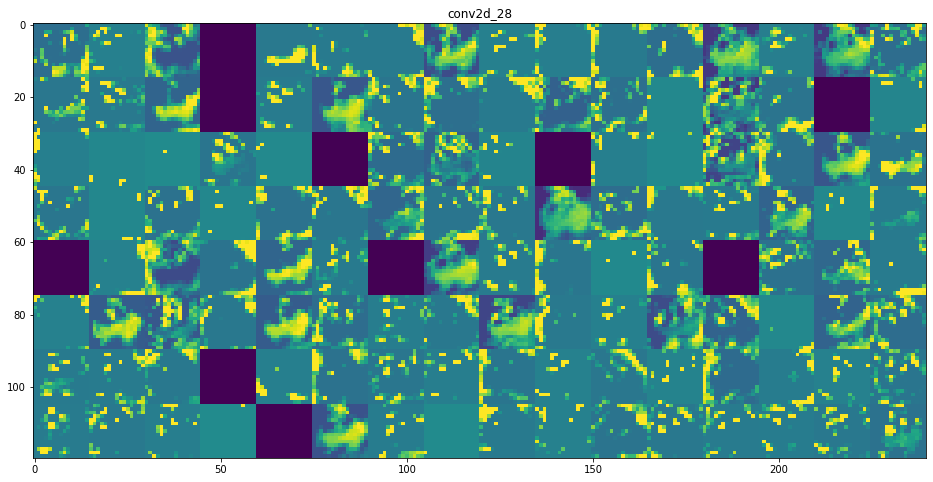

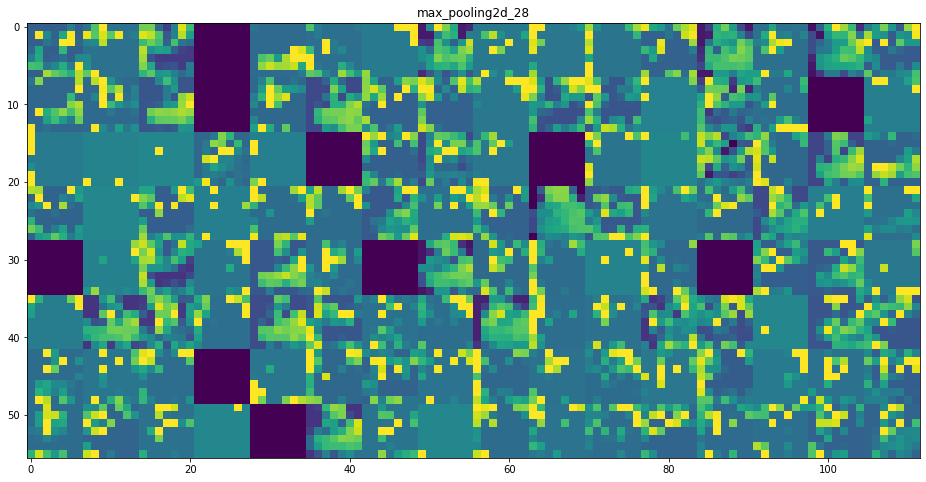

In [43]:
from keras.models import load_model 
from keras import models

m2 = load_model('cd_drop_aug.h5')
layer_outputs = [layer.output for layer in m2.layers[:8]]
activation_model = models.Model(inputs=m2.input, output=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in m2.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1],
                         scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

Each channel extracts specific features from the images. Channel 4 (fourth column images) highlights that the channel can identify eyes. Channel 3, 5 seems to be identifying lines better.

## Visualizing Filters

In [57]:
from keras import backend as K

# funciton to convert a tensor to image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x,0,255).astype('uint8')
    return x

def generate_pattern(filter_ind, size=150):
    
    layer_output = m2.get_layer('conv2d_25').output # using layer max_pooling2d_28
    loss = K.mean(layer_output[:,:,:,filter_ind]) # getting loss for first filter

    grads = K.gradients(loss,m2.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-05) # normalizing gradients with its L2 norm

    # Getting loss and gradient tensors from the DL model
    iterate = K.function([m2.input], [loss,grads])
    #loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

    input_img_data = np.random.random((1,size,size,3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    
    return deprocess_image(img)

#    plt.imshow(deprocess_image(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


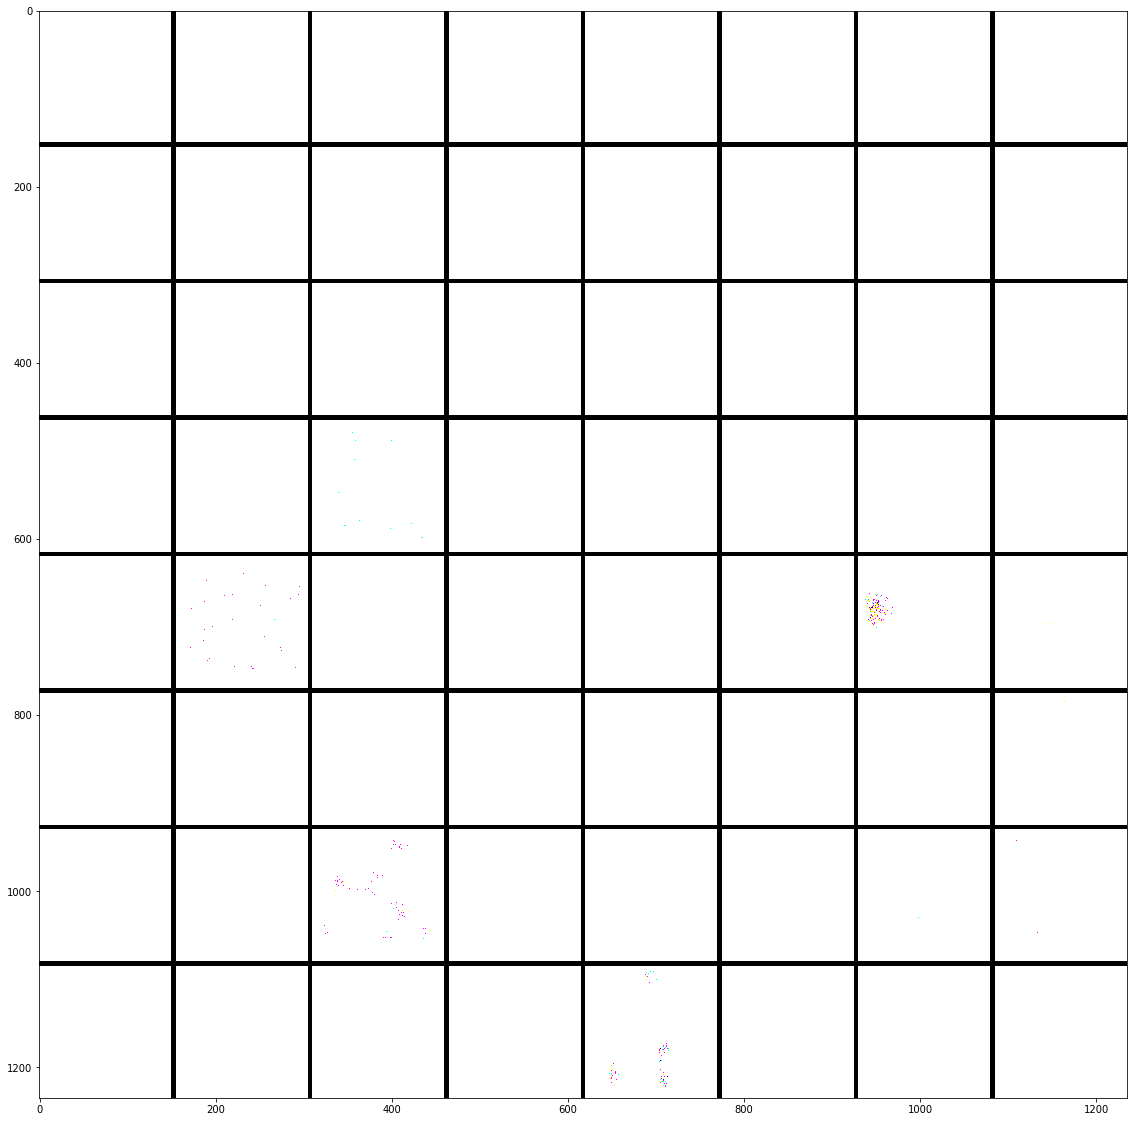

In [64]:
margin = 5
size = 150
results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern( i+(j*8), size)
        
        hor_start = i*size + i*margin
        hor_end = hor_start + size
        ver_start = j*size + j*margin
        ver_end = ver_start + size
        results[hor_start:hor_end,
               ver_start:ver_end,
               :] = filter_img

plt.figure(figsize=(20,20))
plt.imshow(results)